# Data Transformation and Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn


In [3]:
# File paths

unknown_well1 = pd.read_csv('/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/Unkown-1 (points).csv').drop(columns=['MD'])
unknown_well2 = pd.read_csv('/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/Unkown-2 (points).csv').drop(columns=['MD'])
files = [
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/LONCCARICA-1 (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/REZOVACCKE_KRCCEVINE-1 (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/REZOVACCKE_KRCCEVINE-2 (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/SUHOPOLJE-1 (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/VIROVITICA-1 (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/VIROVITICA-3ALFA (points).csv'
]

# Load and process data
dataframes = []
for path in files:
    df = pd.read_csv(path).drop(columns=['MD'], errors='ignore')  # Drop 'MD' and 'holeid' if they exist
    dataframes.append(df)

# Combine dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Combine the 'GM' columns from all three dataframes
combined_gm_values = pd.concat([
    combined_df['GM'],
    unknown_well1['GM'],
    unknown_well2['GM']
])

# Fit the encoder on the combined values
label_encoder.fit(combined_gm_values)

# Transform the 'GM' columns in all three dataframes
combined_df['GM'] = label_encoder.transform(combined_df['GM'])
unknown_well1['GM'] = label_encoder.transform(unknown_well1['GM'])
unknown_well2['GM'] = label_encoder.transform(unknown_well2['GM'])

output_path = '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/features.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(output_path, index=False)

# Machine Learning Training and Evaluation

['VIROVITICA-1' 'VIROVITICA-3ALFA' 'REZOVACCKE_KRCCEVINE-2']
Test HoleID: LONCCARICA-1
Mean Squared Error (MSE): 12.770634048131734
R² Score: 0.9516301420102239
------------------------------


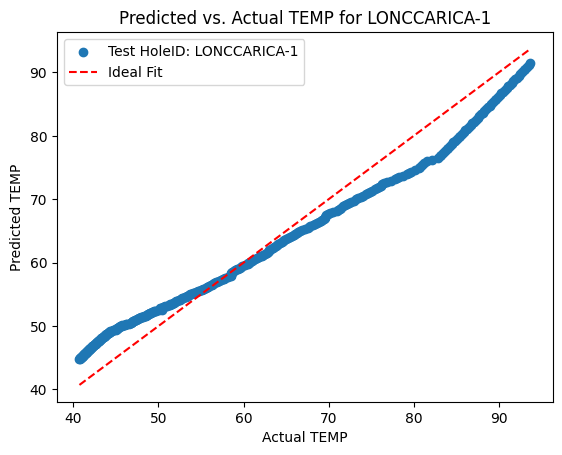

['REZOVACCKE_KRCCEVINE-2' 'VIROVITICA-3ALFA' 'SUHOPOLJE-1']
Test HoleID: REZOVACCKE_KRCCEVINE-1
Mean Squared Error (MSE): 22.14821459455483
R² Score: 0.9739021923630385
------------------------------


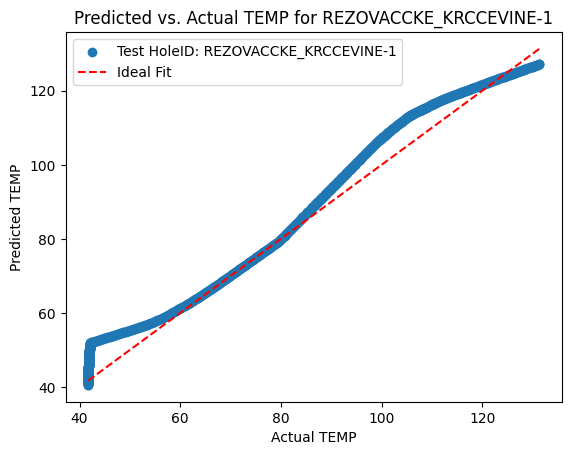

['REZOVACCKE_KRCCEVINE-1' 'VIROVITICA-3ALFA' 'VIROVITICA-1']
Test HoleID: REZOVACCKE_KRCCEVINE-2
Mean Squared Error (MSE): 93.29592770389044
R² Score: 0.9247145701729473
------------------------------


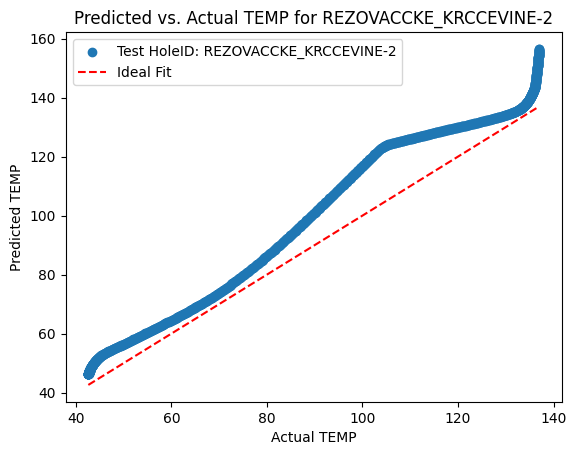

['REZOVACCKE_KRCCEVINE-1' 'REZOVACCKE_KRCCEVINE-2' 'VIROVITICA-3ALFA']
Test HoleID: SUHOPOLJE-1
Mean Squared Error (MSE): 177.68511703678294
R² Score: 0.7990028272522928
------------------------------


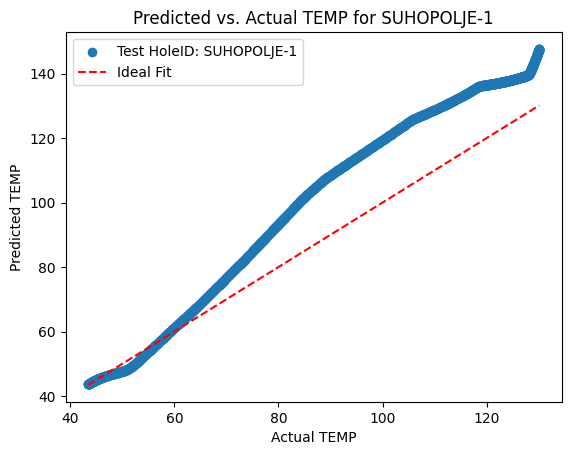

['VIROVITICA-3ALFA' 'REZOVACCKE_KRCCEVINE-2' 'REZOVACCKE_KRCCEVINE-1']
Test HoleID: VIROVITICA-1
Mean Squared Error (MSE): 157.53432050625065
R² Score: 0.8589330962187733
------------------------------


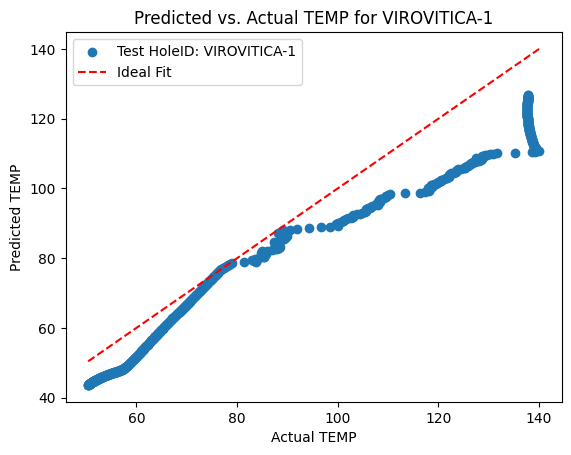

['VIROVITICA-1' 'REZOVACCKE_KRCCEVINE-2' 'REZOVACCKE_KRCCEVINE-1']
Test HoleID: VIROVITICA-3ALFA
Mean Squared Error (MSE): 94.39019084102794
R² Score: 0.9265532426244676
------------------------------


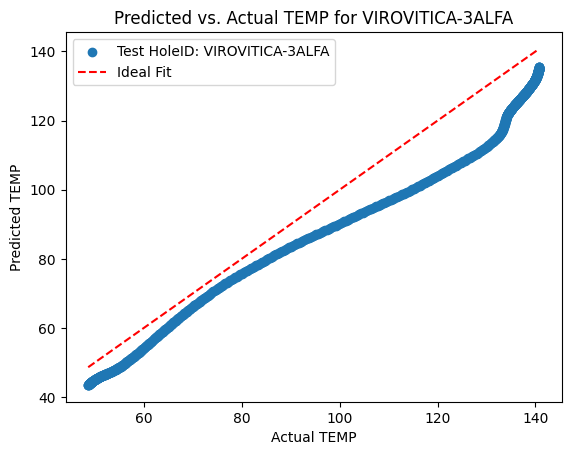

Overall Results:
                   holeid         mse        r2
0            LONCCARICA-1   12.770634  0.951630
1  REZOVACCKE_KRCCEVINE-1   22.148215  0.973902
2  REZOVACCKE_KRCCEVINE-2   93.295928  0.924715
3             SUHOPOLJE-1  177.685117  0.799003
4            VIROVITICA-1  157.534321  0.858933
5        VIROVITICA-3ALFA   94.390191  0.926553
Average MSE: 92.97073412177309
Average R² Score: 0.9057893451069572


In [4]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 3  # You can adjust this based on your data

# Initialize metrics storage
results = []

# Extract unique holeids and their (x, y) coordinates
hole_coords = combined_df[['holeid', 'x', 'y']].drop_duplicates()

for test_holeid in hole_coords['holeid'].unique():
    # Extract the test well's coordinates
    test_coords = hole_coords[hole_coords['holeid'] == test_holeid][['x', 'y']].values

    # Exclude the test well from the training pool
    train_coords = hole_coords[hole_coords['holeid'] != test_holeid]

    # Find k-nearest neighbors based on (x, y) coordinates
    neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neighbors.fit(train_coords[['x', 'y']].values)
    distances, indices = neighbors.kneighbors(test_coords)

    # Get the k-nearest well IDs (excluding the test well)
    nearest_holeids = train_coords.iloc[indices.flatten()]['holeid'].values
    print(nearest_holeids)
    train_df = combined_df[combined_df['holeid'].isin(nearest_holeids)]

    # Test data is still the test well
    test_df = combined_df[combined_df['holeid'] == test_holeid]

    # Separate features and target for training and testing
    X_train = train_df.drop(columns=['holeid', 'TEMP','x','y', 'z','GM'])
    y_train = train_df['TEMP']
    X_test = test_df.drop(columns=['holeid', 'TEMP','x','y', 'z','GM'])
    y_test = test_df['TEMP']

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the model
    mlp = MLPRegressor(
        hidden_layer_sizes=(100,50,25),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        learning_rate='adaptive'
    )
    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test HoleID: {test_holeid}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print("-" * 30)

    # Store the results
    results.append({'holeid': test_holeid, 'mse': mse, 'r2': r2})

    # Plot predicted vs actual TEMP
    plt.scatter(y_test, y_pred, label=f"Test HoleID: {test_holeid}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.xlabel("Actual TEMP")
    plt.ylabel("Predicted TEMP")
    plt.title(f"Predicted vs. Actual TEMP for {test_holeid}")
    plt.legend()
    plt.show()

# Aggregate results
results_df = pd.DataFrame(results)
print("Overall Results:")
print(results_df)
print(f"Average MSE: {results_df['mse'].mean()}")
print(f"Average R² Score: {results_df['r2'].mean()}")


In [5]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Number of nearest neighbors to consider
k = 3  # Adjust this based on your data

# Separate the known and unknown wells
known_wells = combined_df[combined_df['TEMP'].notna()]  # Wells with known temperatures


# Assign unique hole IDs for the unknown wells
unknown_well1['holeid'] = 'Unknown-1'
unknown_well2['holeid'] = 'Unknown-2'

# Combine unknown wells into a single DataFrame
unknown_wells = pd.concat([unknown_well1, unknown_well2], ignore_index=True)

# Extract coordinates for known wells
known_coords = known_wells[['holeid', 'x', 'y']].drop_duplicates()

# Iterate through each unknown well
predictions = []
for unknown_holeid in unknown_wells['holeid'].unique():
    # Extract the coordinates of the unknown well
    unknown_coords = unknown_wells[unknown_wells['holeid'] == unknown_holeid][['x', 'y']].iloc[0].values

    # Find k-nearest neighbors based on (x, y) coordinates
    neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neighbors.fit(known_coords[['x', 'y']].values)
    distances, indices = neighbors.kneighbors([unknown_coords])

    # Get the k-nearest well IDs
    nearest_holeids = known_coords.iloc[indices.flatten()]['holeid'].values
    print(f"Nearest neighbors for unknown well {unknown_holeid}: {nearest_holeids}")

    # Training data: all samples from the nearest wells
    train_df = known_wells[known_wells['holeid'].isin(nearest_holeids)]
    test_df = unknown_wells[unknown_wells['holeid'] == unknown_holeid]

    # Separate features and target for training and testing
    X_train = train_df.drop(columns=['holeid', 'TEMP', 'x', 'y', 'z', 'GM'], errors='ignore')
    y_train = train_df['TEMP']
    X_test = test_df.drop(columns=['holeid', 'TEMP', 'x', 'y', 'z', 'GM'], errors='ignore')

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the neural network model
    mlp = MLPRegressor(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        learning_rate='adaptive'
    )
    mlp.fit(X_train, y_train)

    # Predict the temperature for the unknown well
    y_pred = mlp.predict(X_test)

    # Store the predictions
    for idx, temp_pred in enumerate(y_pred):
        predictions.append({'holeid': unknown_holeid, 'point_index': idx, 'TEMP': temp_pred})

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)
print("Predictions for Unknown Wells:")
print(predictions_df)


Nearest neighbors for unknown well Unknown-1: ['VIROVITICA-1' 'VIROVITICA-3ALFA' 'LONCCARICA-1']
Nearest neighbors for unknown well Unknown-2: ['SUHOPOLJE-1' 'REZOVACCKE_KRCCEVINE-1' 'REZOVACCKE_KRCCEVINE-2']
Predictions for Unknown Wells:
         holeid  point_index        TEMP
0     Unknown-1            0   46.628528
1     Unknown-1            1   46.645684
2     Unknown-1            2   46.662840
3     Unknown-1            3   46.679996
4     Unknown-1            4   46.700700
...         ...          ...         ...
1531  Unknown-2         1110  139.169008
1532  Unknown-2         1111  139.247985
1533  Unknown-2         1112  139.326961
1534  Unknown-2         1113  139.405938
1535  Unknown-2         1114  139.484915

[1536 rows x 3 columns]


Predictions for Unknown Well 1 saved to: /Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW1.csv
Predictions for Unknown Well 2 saved to: /Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW2.csv


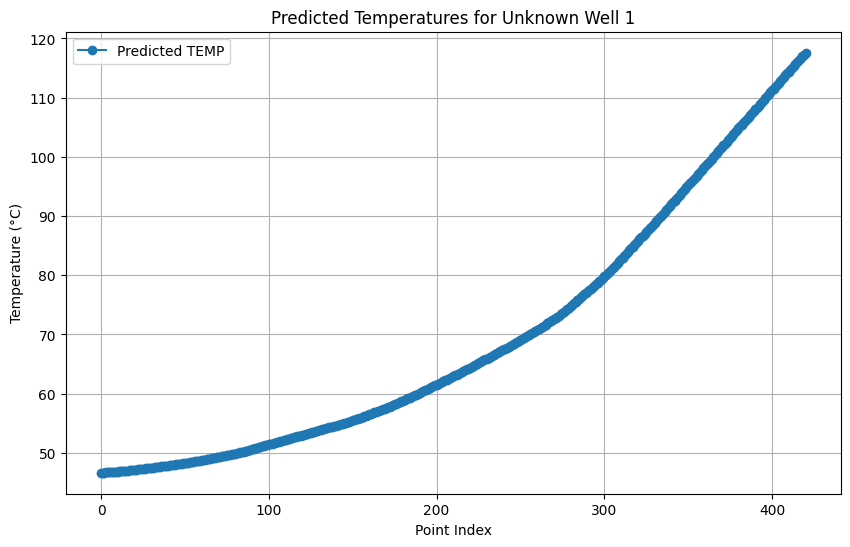

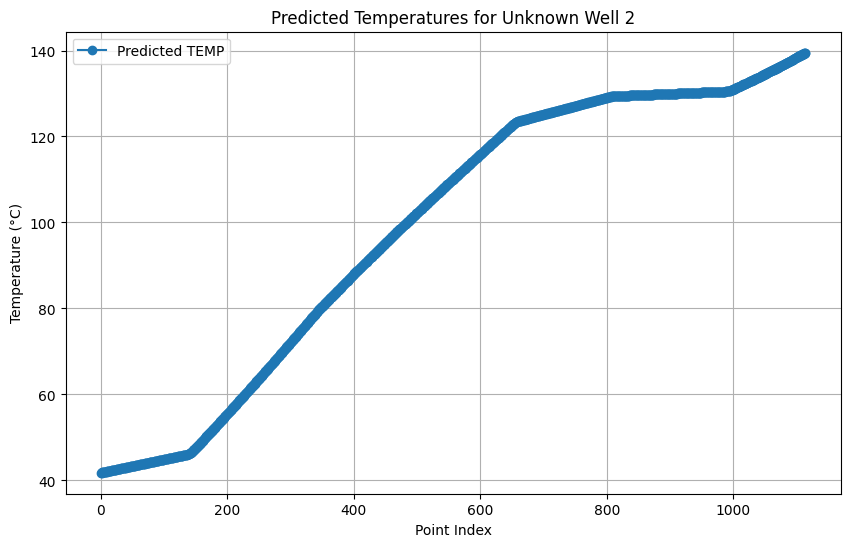

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Output paths for saving predictions
output_path_u1 = "/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW1.csv"
output_path_u2 = "/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW2.csv"

# Convert predictions list to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Filter predictions for each unknown well
temp_pred_u1 = predictions_df[predictions_df['holeid'] == 'Unknown-1']
temp_pred_u2 = predictions_df[predictions_df['holeid'] == 'Unknown-2']

# Save predictions to CSV files
temp_pred_u1.to_csv(output_path_u1, index=False)
print(f"Predictions for Unknown Well 1 saved to: {output_path_u1}")

temp_pred_u2.to_csv(output_path_u2, index=False)
print(f"Predictions for Unknown Well 2 saved to: {output_path_u2}")

# Visualize predictions for Unknown Well 1
plt.figure(figsize=(10, 6))
plt.plot(temp_pred_u1['point_index'], temp_pred_u1['TEMP'], marker='o', label='Predicted TEMP')
plt.title("Predicted Temperatures for Unknown Well 1")
plt.xlabel("Point Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.savefig("/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/PredictionsUW1_Visualization.png")
plt.show()

# Visualize predictions for Unknown Well 2
plt.figure(figsize=(10, 6))
plt.plot(temp_pred_u2['point_index'], temp_pred_u2['TEMP'], marker='o', label='Predicted TEMP')
plt.title("Predicted Temperatures for Unknown Well 2")
plt.xlabel("Point Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.savefig("/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/PredictionsUW2_Visualization.png")
plt.show()


In [7]:
average_unknown1 = temp_pred_u1["TEMP"].mean()
print(average_unknown1)
average_unknown2 = temp_pred_u2["TEMP"].mean()
print(average_unknown2)

69.56277674636117
99.00190301790211
